# CS2 Introductory Notebook 2 - CS1 recap and system modeling

Welcome to the second CS2 introductory notebook! Last notebook was about getting a grasp of the `control` module. This one has two main objectives:

1) Further apply the `control` module to introduce an analyze an aircraft model you will encounter in Lecture 2;
2) Build a model for the _CS2 Bot_, a robot that will accompany us for the next notebooks.

Let's start!

First, run the following two cells to install the needed modules and import the libraries.

In [ ]:
!pip install control
!pip install numpy
!pip install matplotlib

In [ ]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1 - Aircraft model

This exercise introduces you to a model for the longitudinal dynamics of an RC glider that will further be analyzed in Lecture 2.

The state vector $x$ of the system is given by: $$\mathbf{x} = \begin{bmatrix}
    q \\
    u \\
    w \\
    \theta \\
\end{bmatrix}$$

Here is a brief explanation of the parameters:

- Pitch rate $q$: The rate of rotation about the aircraft's lateral axis. A positive $q$ indicates a nose-up rotation, whereas a negative $q$ indicates a nose-down rotation.
- Forward speed $u$: Indicates how fast the aircraft is moving in the direction it is pointing.
- Angle of attack $w$: Indicates the angle between the wings and the free stream velocity of the air.
- Pitch angle $\theta$: Describes the angle between the aircraft's longitudinal axis and the ground.

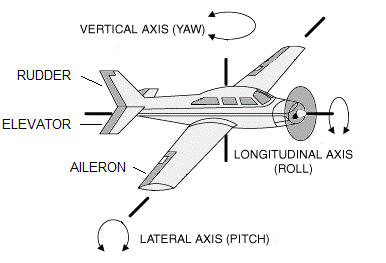

Image source: Optimal Control Design for Smooth Level Turning Flight - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/Aircraft-Dynamics-Moments-Control-Surfaces-11_fig1_354436448 [accessed 16 Feb, 2024]

### 1.1 - Model creation

The system's $A$ and $B$ matrices are given below. For the sake of the exercise, we want the <u>pitch angle</u> $\theta$ to be the <u>output</u>.
In the next cell, declare the corresponding $C$ and $D$ matrices of the system and create the `control.StateSpace` object.

In [ ]:
def get_aircraft_state_space() -> ct.StateSpace:

    # Given matrices A and B
    A = np.array([
        [-15.5801, 4.7122, -38.7221, 0],
        [-0.5257, -0.0166, 2.3501, -9.7847],
        [4.4044, -1.5325, -18.1615, -0.7044],
        [0.9974, 0, 0, 0]
    ])

    B = np.array([
        [-421.2001],
        [1.3231],
        [-17.3812],
        [0]
    ])

    # TODO adapt the values of C and D
    C = None
    D = None

    # TODO replace the next line with your implementation
    return None


You can run the following cell to test your implementation:

In [ ]:
def test_aircraft_state_space(sys: ct.StateSpace) -> bool:

    A_sol = np.array([
    [-15.5801, 4.7122, -38.7221, 0],
    [-0.5257, -0.0166, 2.3501, -9.7847],
    [4.4044, -1.5325, -18.1615, -0.7044],
    [0.9974, 0, 0, 0]
    ])

    B_sol = np.array([
        [-421.2001],
        [1.3231],
        [-17.3812],
        [0]
    ])

    C_sol = np.array([[0, 0, 1, 0]])

    D_sol = np.array([[0]])

    if sys == None:
        print("System cannot be None")
        return False
    elif np.array_equal(sys.A, A_sol) and np.array_equal(sys.B, B_sol) and np.array_equal(sys.C, C_sol) and np.array_equal(sys.D, D_sol):
        print("Your implementation is correct")
        return True
    else:
        print("Your implementation is incorrect")
        return False

is_impl_correct = test_aircraft_state_space(get_aircraft_state_space())

In [ ]:
#Solution

def sol_get_aircraft_state_space() -> ct.StateSpace:
    A = np.array([
        [-15.5801, 4.7122, -38.7221, 0],
        [-0.5257, -0.0166, 2.3501, -9.7847],
        [4.4044, -1.5325, -18.1615, -0.7044],
        [0.9974, 0, 0, 0]
    ])

    B = np.array([
        [-421.2001],
        [1.3231],
        [-17.3812],
        [0]
    ])

    C = np.array([[0, 0, 1, 0]])

    D = np.array([[0]])
    
    return ct.StateSpace(A, B, C, D)

### 1.2 - Stability

We now want to analyze the stability of our model. Given the state space representation of any given LTI system, apply your knowledge from Control Systems 1 to write a Python function that determines whether the system is stable.

In [ ]:
def is_system_stable(sys: ct.StateSpace) -> bool:

    # TODO replace the next line with your implementation
    return None

Feel free to run the next cell to execute some unit tests.

In [ ]:
def test_is_system_stable():
    # Test 0: Check if is_system_stable doesn't return None
    A_dummy = np.array([[1, 0], [0, 1]])
    B_dummy = np.array([[1], [0]])
    C_dummy = np.array([[0, 1]])
    D_dummy = np.array([[0]])
    sys_dummy = ct.StateSpace(A_dummy, B_dummy, C_dummy, D_dummy)
    result = is_system_stable(sys_dummy)
    assert result is not None, "Test 0 failed: is_system_stable returned None"

    # Test 1: Unstable system
    A_unstable = np.array([[1, 1], [0, 1]])
    B_unstable = np.array([[1], [0]])
    C_unstable = np.array([[1, 0]])
    D_unstable = np.array([[0]])
    sys_unstable = ct.StateSpace(A_unstable, B_unstable, C_unstable, D_unstable)
    assert not is_system_stable(sys_unstable), "Test 1 failed: Unstable system not classified as such"

    # Test 2: Marginally stable system
    A_marginally_stable = np.array([[0, 1], [-1, 0]])
    B_marginally_stable = np.array([[1], [0]])
    C_marginally_stable = np.array([[0, 1]])
    D_marginally_stable = np.array([[0]])
    sys_marginally_stable = ct.StateSpace(A_marginally_stable, B_marginally_stable, C_marginally_stable, D_marginally_stable)
    assert is_system_stable(sys_marginally_stable), "Test 2 failed: Marginally stable system not classified as stable"

    # Test 3: Stable system (replace A_stable with your stable A matrix)
    A_stable = np.array([[-0.5, 0], [0, -1]])
    B_stable = np.array([[1], [0]])
    C_stable = np.array([[0, 1]])
    D_stable = np.array([[0]])
    sys_stable = ct.StateSpace(A_stable, B_stable, C_stable, D_stable)
    assert is_system_stable(sys_stable), "Test 3 failed: Stable system not classified as such"

    # Test 4: Check aircraft stability
    aircraft_sys = sol_get_aircraft_state_space()
    assert is_system_stable(aircraft_sys), "Test 4 failed: Aircraft should be stable"

    print("All tests passed!")

# Run the tests
test_is_system_stable()

In [ ]:
#Solution
def sol_is_system_stable(sys: ct.StateSpace) -> bool:
    eigenvalues, _ = np.linalg.eig(sys.A)
    
    # Check if all eigenvalues have negative real parts
    if all(np.real(eig_val) <= 0 for eig_val in eigenvalues):
        return True
    else:
        return False

### 1.3 - Initial-conditions response

In order to better understand the model, let's now take a look at the time response of the system to non-zero states.

In the next cell, complete the function to plot the response to the state `x0`. As always, feel free to refer to the documentation of the `control` module.

In [ ]:
#TODO introduce a small perturbation by changing the value of x0 to a non-zero initial state
x0 = np.array([0, 0, 0, 0])


def plot_initial_conditions_response(sys: ct.StateSpace, initial_conditions: np.array) -> None:
    
    # TODO replace next line with your implementation
    pass

Is this behavior expected in aircrafts? Try to find an intuitive explanation for it.

You can run the next cell if you want to check the solution, which plots the response to your `x0`. Be sure to only do it after trying to solve the exercise yourself!

In [ ]:
def sol_plot_initial_conditions_response(sys: ct.StateSpace, initial_conditions: np.array) -> None:
    # Simulate the system response to the given initial conditions
    print(initial_conditions)
    time, response = ct.initial_response(sys, X0 = initial_conditions, T=250)


    # Plot the response
    plt.figure(figsize=(10, 6))

    # Plot pitch rate (q)
    plt.plot(time, response)
    plt.xlabel('Time (s)')
    plt.ylabel('System output')
    plt.title('Initial condition response')
    plt.show()

sol_plot_initial_conditions_response(sol_get_aircraft_state_space(), x0)



print("""Explanation:

First and foremost, the system is stable, so we somehow expect the response to eventually converge to zero.

Then we can also find a logical explanation for this behavior: Let's say we have a slight perturbation of the pitch angle, maybe by wind.
Instead of immediately returning to its original flight path, the aircraft might start a gentle, rhythmic pattern of climbing and then descending.
During the climb, its speed decreases due to the increase in potential energy, and during the descent,
its speed increases as the potential energy is converted back into kinetic energy. This cycle can repeat several times,
forming what we know as phugoid oscillations.


Make sure to check out Lecture 2 for a more in-detail explanation of the model with a cool video! :)""")


## Exercise 2 - The CS2 Bot

In this exercise we introduce the CS2 bot, a robot whose control system we are going to develop over the next jupyter notebooks.

The CS2 bot's objective is to move around following a given trajectory. The states of the bot are $(x, y, \theta)$ where $(x, y)$ is the position of the CS2 bot in the plane and $\theta$ is the angle of the robot with respect to the x-axis. The input of the robot is given by $(v, \omega)$ where $v$ is the forward velocity and $\omega$ is the angular speed.

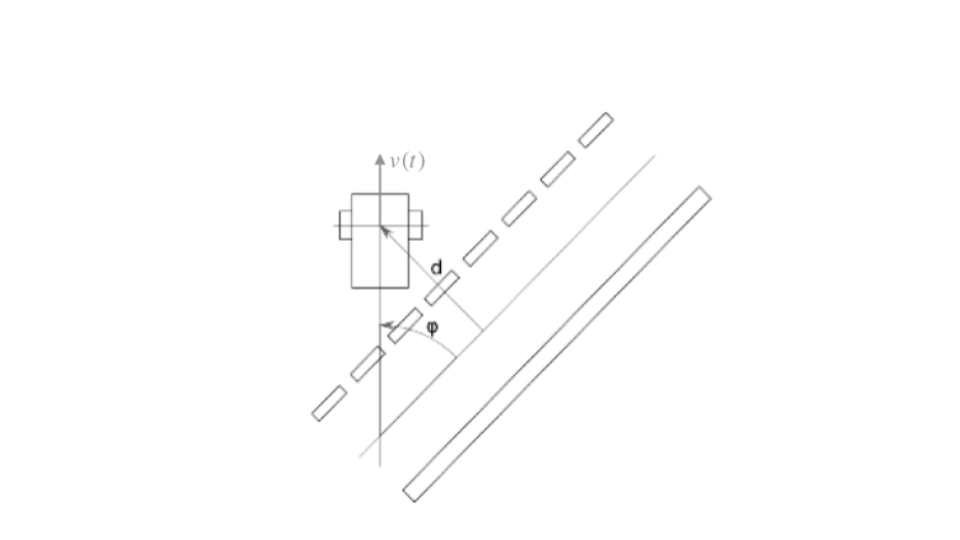

Let's model the system using the infos given above. Also note that the output of the system should be the position $(x, y)$.

In the next cell, implement a function that returns $\dot{x}$, the derivative of the state vector. Note that the angular velocity, given as `omega` in the exercise, is limited to a maximum value. Thus, the system is nonlinear.

In [ ]:
def get_xdot(t: float, x: np.array, u: np.array, params: dict) -> np.array:
    # Return the derivative of the state
    max_omega = params.get('max_omega', 0.05)
    omega = np.clip(u[1], -max_omega, max_omega)

    #TODO replace the next line with an instruction that returns [xdot, ydot, thetadot] as a numpy array
    return None

The next cell contains unit tests. Run it to test your implementation.

In [ ]:
def assert_almost_equal(actual, expected, tolerance=1e-5):
    assert np.all(np.abs(actual - expected) < tolerance), f"Expected {expected}, but got {actual}"

def test_get_xdot_return_value():
    params = {'max_omega': 0.05}
    x = np.array([1.0, 2.0, 0.0])
    u = np.array([1.0, 0.1])
    result = get_xdot(0.0, x, u, params)
    assert result is not None, "The function get_xdot should return a value, not None"

def test_forward_motion():
    params = {'max_omega': 0.05}
    x = np.array([1.0, 2.0, 0.0])  # initial state [x, y, theta]
    u = np.array([2.0, 0.0])       # input [v, omega]
    expected_result = np.array([2.0, 0.0, 0.0])
    result = get_xdot(0.0, x, u, params)
    assert_almost_equal(result, expected_result)

def test_rotation():
    params = {'max_omega': 0.05}
    x = np.array([1.0, 2.0, 0.0])
    u = np.array([0.0, 0.01])
    expected_result = np.array([0.0, 0.0, 0.01])
    result = get_xdot(0.0, x, u, params)
    assert_almost_equal(result, expected_result)

def test_clipping_omega():
    params = {'max_omega': 0.05}
    x = np.array([1.0, 2.0, 0.0])
    u = np.array([0.0, 0.1])  # omega exceeds max_omega
    expected_result = np.array([0.0, 0.0, params['max_omega']])
    result = get_xdot(0.0, x, u, params)
    assert_almost_equal(result, expected_result)

def test_combined_motion():
    params = {'max_omega': 0.05}
    x = np.array([1.0, 2.0, np.pi/4])
    u = np.array([1.0, 0.1])
    expected_result = np.array([np.cos(np.pi/4), np.sin(np.pi/4), 0.05])
    result = get_xdot(0.0, x, u, params)
    assert_almost_equal(result, expected_result)

def run_tests():
    test_get_xdot_return_value()  # Add the new test
    test_forward_motion()
    test_rotation()
    test_clipping_omega()
    test_combined_motion()
    print("All tests passed!")

run_tests()

Inside the next cell, implement a function that returns the output vector (i.e. the position in Cartesian coordinates) of the bot.

In [ ]:
def get_y(t: float, x: np.array, u: np.array, params: dict) -> np.array:

    #TODO replace next line with your implementation
    return None

Here are the unit tests for this part:

In [ ]:
def test_get_y_not_none():
    params = {'max_omega': 0.05}
    
    # Test: Check if the output is not None for a sample input
    x = np.array([1.0, 2.0, 0.0])
    u = np.array([1.0, 0.1])
    result = get_y(0.0, x, u, params)
    assert result is not None, "The function get_y should return a value, not None"

def test_get_y_output():
    params = {'max_omega': 0.05}
    
    # Test 1: Check the output when x is [1.0, 2.0, 0.0]
    x1 = np.array([1.0, 2.0, 0.0])
    u1 = np.array([1.0, 0.1])
    result1 = get_y(0.0, x1, u1, params)
    expected_result1 = np.array([1.0, 2.0])
    assert_almost_equal(result1, expected_result1)

    # Test 2: Check the output when x is [0.0, 0.0, pi/2]
    x2 = np.array([0.0, 0.0, np.pi/2])
    u2 = np.array([2.0, 0.0])
    result2 = get_y(0.0, x2, u2, params)
    expected_result2 = np.array([0.0, 0.0])
    assert_almost_equal(result2, expected_result2)

if __name__ == '__main__':
    test_get_y_not_none()
    test_get_y_output()
    print("All tests passed!")

Finally, in the next cell you can find the solution. Be sure to only open it after trying yourself!

In [ ]:
def get_xdot_solution(t: float, x: np.array, u: np.array, params: dict) -> np.array:
    # Return the derivative of the state
    max_omega = params.get('max_omega', 0.05)
    omega = np.clip(u[1], -max_omega, max_omega)
    return np.array([
        u[0] * np.cos(x[2]),    # xdot = v cos(theta)
        u[0] * np.sin(x[2]),    # ydot = v sin(theta)
        omega     # thdot = w
    ])

def get_ydot_solution(t: float, x: np.array, u: np.array, params: dict) -> np.array:
    return x[0:2]

Make sure you have a good understanding of the system: As mentioned above, we are going to try some new control approaches on it in the next notebooks.

Congratulations, you finished this Jupyter Notebook! Have fun with the rest of the course :)